<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisCuantitativoAvanzado/blob/main/Regresi%C3%B3n/RegLin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import userdata
import json

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
    'username': userdata.get('KAGGLE_USER'),
    'key': userdata.get('KAGGLE_KEY')}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d quantbruce/real-estate-price-prediction

Dataset URL: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction
License(s): other
  0% 0.00/6.98k [00:00<?, ?B/s]
100% 6.98k/6.98k [00:00<00:00, 19.3MB/s]


In [2]:
import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [3]:
df = pd.read_csv('/content/Real estate.csv')

In [4]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
# Primero podemos pensar en hacer una regresión lineal simple
from sklearn.linear_model import LinearRegression
X =  df[['X2 house age']]
y = df['Y house price of unit area']

reg = LinearRegression().fit(X, y)
score = reg.score(X, y)

In [6]:
score

0.04433848097791171

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


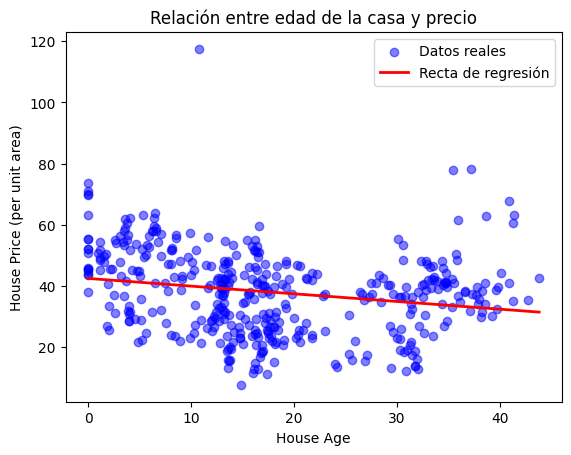

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter de los datos reales
plt.scatter(X, y, color='blue', alpha=0.5, label='Datos reales')

# Línea de regresión
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = reg.predict(x_vals)
plt.plot(x_vals, y_pred, color='red', linewidth=2, label='Recta de regresión')

# Etiquetas y título
plt.xlabel('House Age')
plt.ylabel('House Price (per unit area)')
plt.title('Relación entre edad de la casa y precio')
plt.legend()
plt.show()

In [8]:
# Nada impide meter más datos en la regresión, pero ahora ya no lo podríamos graficar.
from sklearn.linear_model import LinearRegression
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

reg = LinearRegression().fit(X, y)
score = reg.score(X, y)

In [9]:
score

0.5833632616324717

In [28]:
# Con esto puedo ver la relación, puedo buscar también hacer una predicción.
from sklearn.linear_model import LinearRegression
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

reg = LinearRegression().fit(X[:-1], y[:-1])
score = reg.score(X[:-1], y[:-1])

In [29]:
reg.predict(X[-1:])

array([52.87855662])

In [30]:
# Podría, como vimos, generar más variables
for x in X.columns:
    X['%s_2' % x] = X[x]*X[x]
    X['%s_3' % x] = X[x]**3
    X['%s_4' % x] = X[x]**4

In [31]:
reg = LinearRegression().fit(X, y)
score = reg.score(X, y)

In [32]:
# El score debería mejorar
score

0.6940115985187727

In [15]:
 # ¿Mejora la predicción?

In [33]:
reg = LinearRegression().fit(X[:-1], y[:-1])
score = reg.score(X[:-1], y[:-1])

In [34]:
score

0.691942719409812

In [35]:
reg.predict(X[-1:])

array([56.61558015])

In [36]:
reg.coef_

array([ 1.18256685e-03, -3.68882277e-07, -6.17609976e-03, -2.90622198e-02,
        3.91518035e-04,  8.19204717e-08, -2.70489736e-10, -9.57919113e-05,
        4.79503557e-07, -6.91227408e-10, -4.79077013e-07, -7.23146453e-04,
        2.69604914e-07, -6.18921697e-02,  2.37406633e-03, -2.32233923e-05,
        1.29043518e-05, -2.27242822e-09,  1.34159389e-13,  2.52481431e-03,
        1.10156372e-02, -1.02564888e-03,  4.05232073e-06,  1.50327858e-04,
        4.95661376e-03, -4.37732158e-08, -3.97422582e-06,  5.08992724e-06])

In [37]:
from sklearn.model_selection import train_test_split
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']
X_train, X_test, y_train, y_test=train_test_split(X,y)

In [38]:
reg = LinearRegression().fit(X_train, y_train)
score = reg.score(X_train, y_train)
score

0.5646493738948433

In [39]:
score = reg.score(X_test, y_test)
score

0.6398369374770587

In [40]:
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

In [41]:
for x in X.columns:
    X['%s_2' % x] = X[x]*X[x]
    X['%s_3' % x] = X[x]**3

In [42]:
X_train, X_test, y_train, y_test=train_test_split(X,y)

In [43]:
reg = LinearRegression().fit(X_train, y_train)
score = reg.score(X_train, y_train)
score

0.6844411767454821

In [44]:
score = reg.score(X_test, y_test)
score

0.6978582697432698